In [921]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [922]:
pip install scikit-learn


[notice] A new release of pip available: 22.2.2 -> 23.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [923]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [924]:
df = pd.read_csv('/Users/liu/Desktop/MBAN6110/games.csv')

In [925]:
metadata = pd.read_json('/Users/liu/Desktop/MBAN6110/games_metadata.json', lines=True)


In [926]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [927]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50503 non-null  int64 
 1   description  50503 non-null  object
 2   tags         50503 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [928]:
df = pd.merge(df, metadata[['app_id', 'description', 'tags']], on='app_id', how='left')


In [929]:
df = df.drop('description', axis=1)

In [930]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,[Action]
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [931]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
 13  tags            50503 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(4)
memory usage: 4.0+ MB


In [932]:
df.drop_duplicates(subset=['app_id', 'title', 'date_release', 'win', 'mac', 'linux',
                             'rating', 'positive_ratio', 'user_reviews', 'price_final',
                             'price_original', 'discount', 'steam_deck'], inplace=True)

In [933]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50503 entries, 0 to 50502
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50503 non-null  int64  
 1   title           50503 non-null  object 
 2   date_release    50503 non-null  object 
 3   win             50503 non-null  bool   
 4   mac             50503 non-null  bool   
 5   linux           50503 non-null  bool   
 6   rating          50503 non-null  object 
 7   positive_ratio  50503 non-null  int64  
 8   user_reviews    50503 non-null  int64  
 9   price_final     50503 non-null  float64
 10  price_original  50503 non-null  float64
 11  discount        50503 non-null  float64
 12  steam_deck      50503 non-null  bool   
 13  tags            50503 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(4)
memory usage: 4.0+ MB


no duplicates

In [934]:
import matplotlib.pyplot as plt

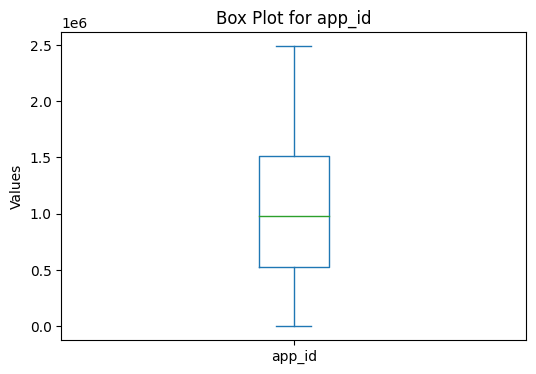

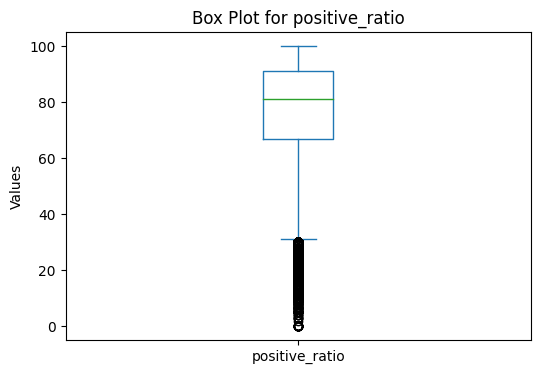

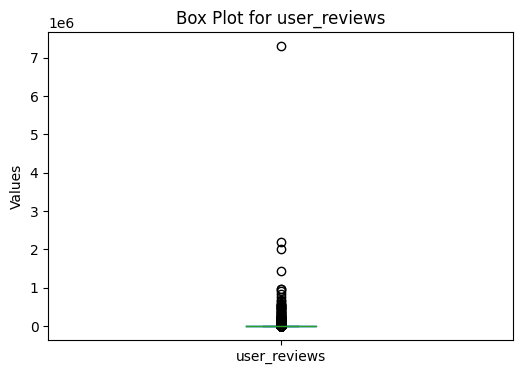

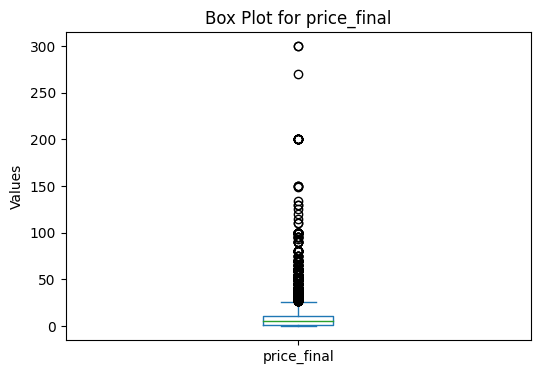

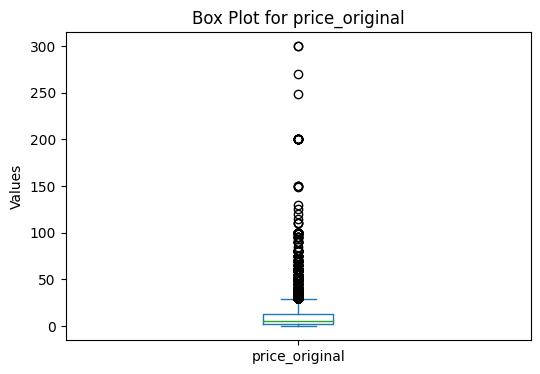

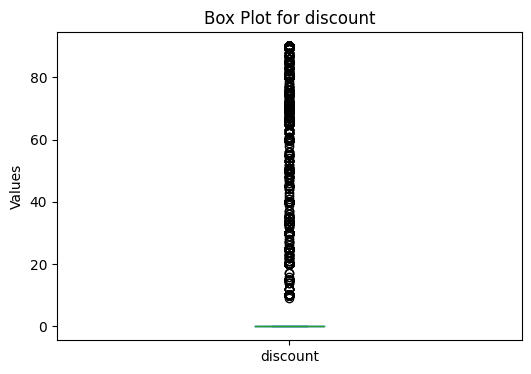

In [935]:
# Iterate over columns
for column in df.columns:
    # Skip non-numeric columns
    if not df[column].dtype in [float, int]:
        continue
    # Create a box plot
    plt.figure(figsize=(6, 4))
    df[column].plot.box()
    
    # Set the title and labels
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    
    # Show the plot
    plt.show()

In [936]:
df.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.050300e+04,50503.000000,5.050300e+04,50503.000000,50503.000000,50503.000000
mean,1.048405e+06,77.033622,1.776163e+03,8.549623,9.166772,5.716254
std,6.058853e+05,18.261259,3.912721e+04,11.468167,11.917905,18.779479
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.265205e+05,67.000000,1.900000e+01,0.990000,1.990000,0.000000
50%,9.793100e+05,81.000000,4.800000e+01,4.990000,4.990000,0.000000
75%,1.514985e+06,91.000000,2.040000e+02,10.990000,12.990000,0.000000
max,2.488153e+06,100.000000,7.297791e+06,299.990000,299.990000,90.000000


In [937]:
df = df[df['price_final'] < 29]
df = df[df['price_original'] < 30]

In [938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47693 entries, 0 to 50502
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          47693 non-null  int64  
 1   title           47693 non-null  object 
 2   date_release    47693 non-null  object 
 3   win             47693 non-null  bool   
 4   mac             47693 non-null  bool   
 5   linux           47693 non-null  bool   
 6   rating          47693 non-null  object 
 7   positive_ratio  47693 non-null  int64  
 8   user_reviews    47693 non-null  int64  
 9   price_final     47693 non-null  float64
 10  price_original  47693 non-null  float64
 11  discount        47693 non-null  float64
 12  steam_deck      47693 non-null  bool   
 13  tags            47693 non-null  object 
dtypes: bool(4), float64(3), int64(3), object(4)
memory usage: 4.2+ MB


In [939]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,[Action]
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [940]:
df['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

In [941]:
df.groupby('rating')[['positive_ratio','user_reviews', 'price_final','price_original','discount']].mean().round(2).sort_values(by='positive_ratio', ascending=False)

,positive_ratio,user_reviews,price_final,price_original,discount
rating,,,,,
Overwhelmingly Positive,96.25,17362.68,9.44,10.03,4.43
Positive,91.25,21.61,5.53,6.06,6.58
Very Positive,88.88,3239.67,7.82,8.30,4.44
Mostly Positive,74.55,720.50,6.87,7.46,6.60
Mixed,57.64,531.49,6.29,6.76,5.86
Mostly Negative,31.32,222.11,6.11,6.45,4.49
Overwhelmingly Negative,15.31,4084.85,6.95,7.07,3.85
Very Negative,13.62,140.29,8.93,9.15,1.43
Negative,11.98,18.48,6.43,6.75,5.53


In [942]:
df[['win', 'mac', 'linux', 'steam_deck']].apply(pd.value_counts)

,win,mac,linux,steam_deck
False,791,35166,38975,1
True,46902,12527,8718,47692


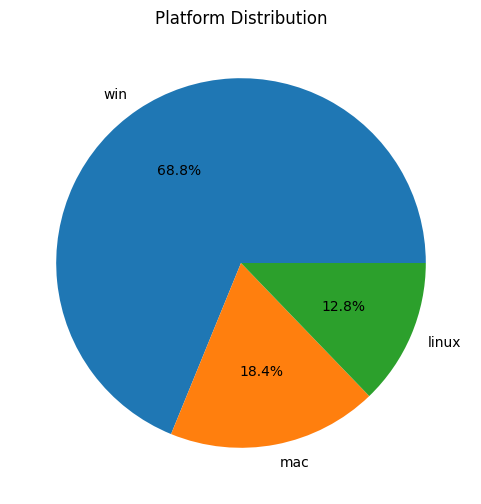

In [943]:
platform_counts = df[['win', 'mac', 'linux']].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%')
plt.title('Platform Distribution')
plt.show()

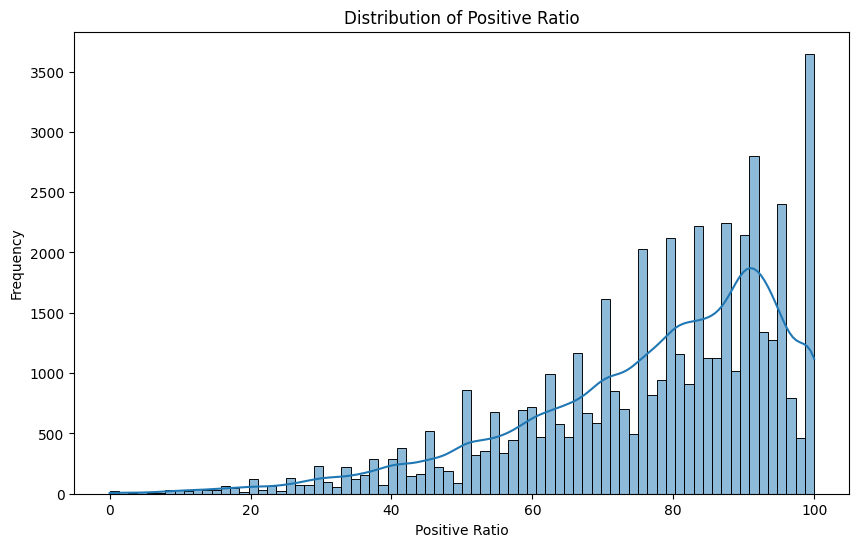

In [944]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['positive_ratio'], kde=True)
plt.xlabel('Positive Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Positive Ratio')
plt.show()

Series Size  441
Average Common Genres  1268.6575963718822


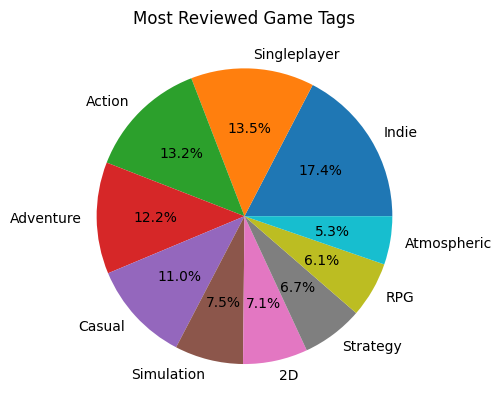

In [946]:
genres = df['tags']
count_list = []
for i in genres:
    for j in i:
        count_list.append(j)

sorted_genres = pd.value_counts(np.array(count_list))
sorted_genres = sorted_genres.sort_values(ascending=False)
print("Series Size ", sorted_genres.size)
print("Average Common Genres ", sorted_genres.mean())

# Create a chart to help us see our results
genre_slice = sorted_genres.head(10)
labels = genre_slice.keys()

fig, ax = plt.subplots()
plt.title('Most Reviewed Game Tags')
pchart = ax.pie(genre_slice, labels = labels, autopct='%1.1f%%')

Series Size  62
Average Common Genres  1.467741935483871


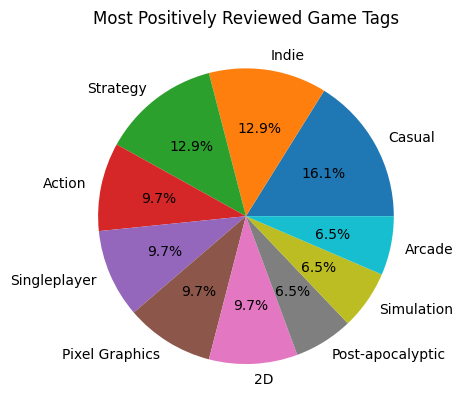

In [947]:
positive_games = df.sort_values('positive_ratio', ascending=False)
positivedf = positive_games.head(10)
tags = positivedf['tags']
count_list = []
for i in tags:
    for j in i:
        count_list.append(j)

sorted_tags = pd.value_counts(np.array(count_list))
sorted_tags = sorted_tags.sort_values(ascending=False)
print("Series Size ", sorted_tags.size)
print("Average Common Genres ", sorted_tags.mean())  

# Create a chart to help us see our results
tag_slice = sorted_tags.head(10)
labels = tag_slice.keys()

fig, ax = plt.subplots()
plt.title('Most Positively Reviewed Game Tags')
pchart = ax.pie(tag_slice, labels = labels, autopct='%1.1f%%')

In [948]:
# Convert the 'date_release' column to datetime type
df['date_release'] = pd.to_datetime(df['date_release'])

# Extract the year and month from the 'date_release' column
df['release_year'] = df['date_release'].dt.year
df['release_month'] = df['date_release'].dt.month

# Remove unnecessary columns
df.drop(['app_id', 'title', 'date_release'], axis=1, inplace=True)



In [949]:
# Convert 'rating' column to numerical representation (e.g., Very Positive -> 1, Mostly Positive -> 0.75, etc.)
rating_map = {
    'Very Positive': 5,
    'Mostly Positive': 4,
    'Positive': 3,
    'Mixed': 2,
    'Negative': 1,
    'Overwhelmingly Negative': 0
}
df['rating'] = df['rating'].map(rating_map)

In [950]:
# Convert boolean columns to 0/1 representation
bool_columns = ['win', 'mac', 'linux', 'steam_deck']
df[bool_columns] = df[bool_columns].astype(int)


In [951]:
import json
import ast

In [956]:
# Parse the 'tags' column as a list
def parse_tags(tags_str):
    try:
        return ast.literal_eval(tags_str)
    except:
        return []

df['tags'] = metadata['tags'].apply(parse_tags)

# Create dummy variables for each unique tag
unique_tags = set(tag for tags_list in df['tags'] for tag in tags_list)
for tag in unique_tags:
    df[tag] = metadata['tags'].apply(lambda tags_list: 1 if tag in tags_list else 0)
# Drop the original 'tags' column as we no longer need it
df.drop(['tags'], axis=1, inplace=True)   

In [953]:
df.describe()

,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,release_year,release_month
count,47693.000000,47693.000000,47693.000000,44881.000000,47693.000000,4.769300e+04,47693.000000,47693.000000,47693.000000,47693.000000,47693.000000,47693.000000
mean,0.983415,0.262659,0.182794,3.450569,77.109010,1.445061e+03,6.629027,7.132853,5.737278,0.999979,2018.612165,6.531566
std,0.127713,0.440083,0.386502,1.153702,18.328255,3.941069e+04,6.570084,6.804008,18.762804,0.004579,3.102607,3.423263
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,1997.000000,1.000000
25%,1.000000,0.000000,0.000000,2.000000,67.000000,1.900000e+01,0.990000,0.990000,0.000000,1.000000,2017.000000,4.000000
50%,1.000000,0.000000,0.000000,3.000000,81.000000,4.600000e+01,4.990000,4.990000,0.000000,1.000000,2019.000000,6.000000
75%,1.000000,1.000000,0.000000,5.000000,91.000000,1.810000e+02,9.990000,9.990000,0.000000,1.000000,2021.000000,10.000000
max,1.000000,1.000000,1.000000,5.000000,100.000000,7.297791e+06,28.990000,29.990000,90.000000,1.000000,2023.000000,12.000000


In [957]:
df.head()

,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,release_year,release_month,age_of_game
0,1,0,0,5.0,84,2199,9.99,9.99,0.0,1,2008,11,15
1,1,0,0,3.0,85,21,2.99,2.99,0.0,1,2011,8,12
2,1,1,1,5.0,92,3722,14.99,14.99,0.0,1,2013,4,10
3,1,0,0,2.0,61,873,14.99,14.99,0.0,1,2014,11,9
4,1,1,0,5.0,88,8784,11.99,11.99,0.0,1,2014,10,9


In [958]:
df['age_of_game'] = 2023 - df['release_year']  # Calculate age of the house

In [960]:
# Prepare the input features (X) and the target variable (y)
X = df.drop(['rating'], axis=1)
y = df['rating']
results = ols("rating ~ win + mac + linux + positive_ratio + user_reviews + price_final + price_original + discount + steam_deck + age_of_game", data=df).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     2815.
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:35:52   Log-Likelihood:                -59171.
No. Observations:               44881   AIC:                         1.184e+05
Df Residuals:                   44870   BIC:                         1.185e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.7605      0.906     -0.

In [961]:
"y_hat = -0.7605 + 0.6034win + 0.1016mac + 0.0221linux + 0.0442positive_ratio + 5.203e-07user_reviews + 0.0017price_final + 0.0141price_original -0.0016discount -0.1808steam_deck + 0.0443age_of_game"

'y_hat = -0.7605 + 0.6034win + 0.1016mac + 0.0221linux + 0.0442positive_ratio + 5.203e-07user_reviews + 0.0017price_final + 0.0141price_original -0.0016discount -0.1808steam_deck + 0.0443age_of_game'

In [964]:
pred_vals = results.predict(df[['win', 'mac', 'linux', 'positive_ratio', 'user_reviews','price_original', 'price_final', 'discount', 'steam_deck', 'age_of_game']])

In [965]:
 pred_vals

0        4.199968
1        3.998825
2        4.535980
3        2.996142
4        4.247678
           ...   
50498    3.198437
50499    1.607497
50500    3.012865
50501    2.548689
50502    3.773071
Length: 47693, dtype: float64

In [966]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['rating']], axis=1)

In [967]:
res

,y_hat,rating
0,4.199968,5.0
1,3.998825,3.0
2,4.535980,5.0
3,2.996142,2.0
4,4.247678,5.0
...,...,...
50498,3.198437,3.0
50499,1.607497,2.0
50500,3.012865,4.0
50501,2.548689,2.0


In [968]:
res['error'] = res['y_hat'] - res['rating']

In [969]:
res.head(1)

,y_hat,rating,error
0,4.199968,5.0,-0.800032


In [970]:
res['sq_error'] = res['error']**2

In [971]:
np.sqrt(res['sq_error'].mean())

0.9043388822990707

In [972]:
df.describe()

,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,release_year,release_month,age_of_game
count,47693.000000,47693.000000,47693.000000,44881.000000,47693.000000,4.769300e+04,47693.000000,47693.000000,47693.000000,47693.000000,47693.000000,47693.000000,47693.000000
mean,0.983415,0.262659,0.182794,3.450569,77.109010,1.445061e+03,6.629027,7.132853,5.737278,0.999979,2018.612165,6.531566,4.387835
std,0.127713,0.440083,0.386502,1.153702,18.328255,3.941069e+04,6.570084,6.804008,18.762804,0.004579,3.102607,3.423263,3.102607
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,1997.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,2.000000,67.000000,1.900000e+01,0.990000,0.990000,0.000000,1.000000,2017.000000,4.000000,2.000000
50%,1.000000,0.000000,0.000000,3.000000,81.000000,4.600000e+01,4.990000,4.990000,0.000000,1.000000,2019.000000,6.000000,4.000000
75%,1.000000,1.000000,0.000000,5.000000,91.000000,1.810000e+02,9.990000,9.990000,0.000000,1.000000,2021.000000,10.000000,6.000000
max,1.000000,1.000000,1.000000,5.000000,100.000000,7.297791e+06,28.990000,29.990000,90.000000,1.000000,2023.000000,12.000000,26.000000


(array([1.5000e+01, 2.8440e+03, 1.1196e+04, 6.6490e+03, 3.4810e+03,
        1.0334e+04, 9.3100e+03, 1.0500e+03, 1.0000e+00, 1.0000e+00]),
 array([-2.32878616, -1.79726198, -1.26573781, -0.73421363, -0.20268945,
         0.32883472,  0.8603589 ,  1.39188308,  1.92340725,  2.45493143,
         2.98645561]),
 <BarContainer object of 10 artists>)

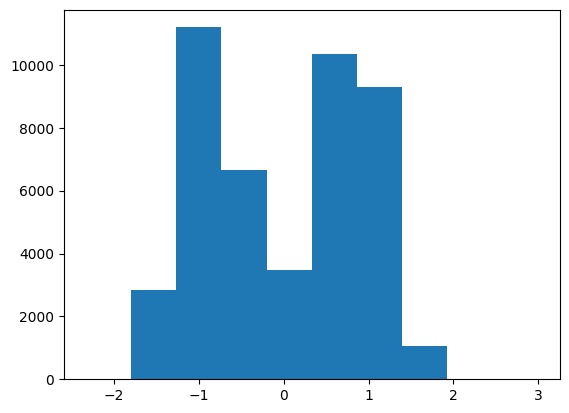

In [973]:
 plt.hist(res['error'])

(array([1.3000e+01, 0.0000e+00, 2.9200e+02, 0.0000e+00, 1.1339e+04,
        0.0000e+00, 1.3073e+04, 0.0000e+00, 8.1440e+03, 1.2020e+04]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

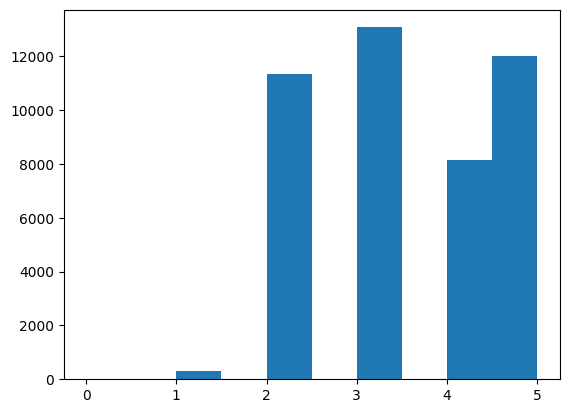

In [974]:
plt.hist(df['rating'])

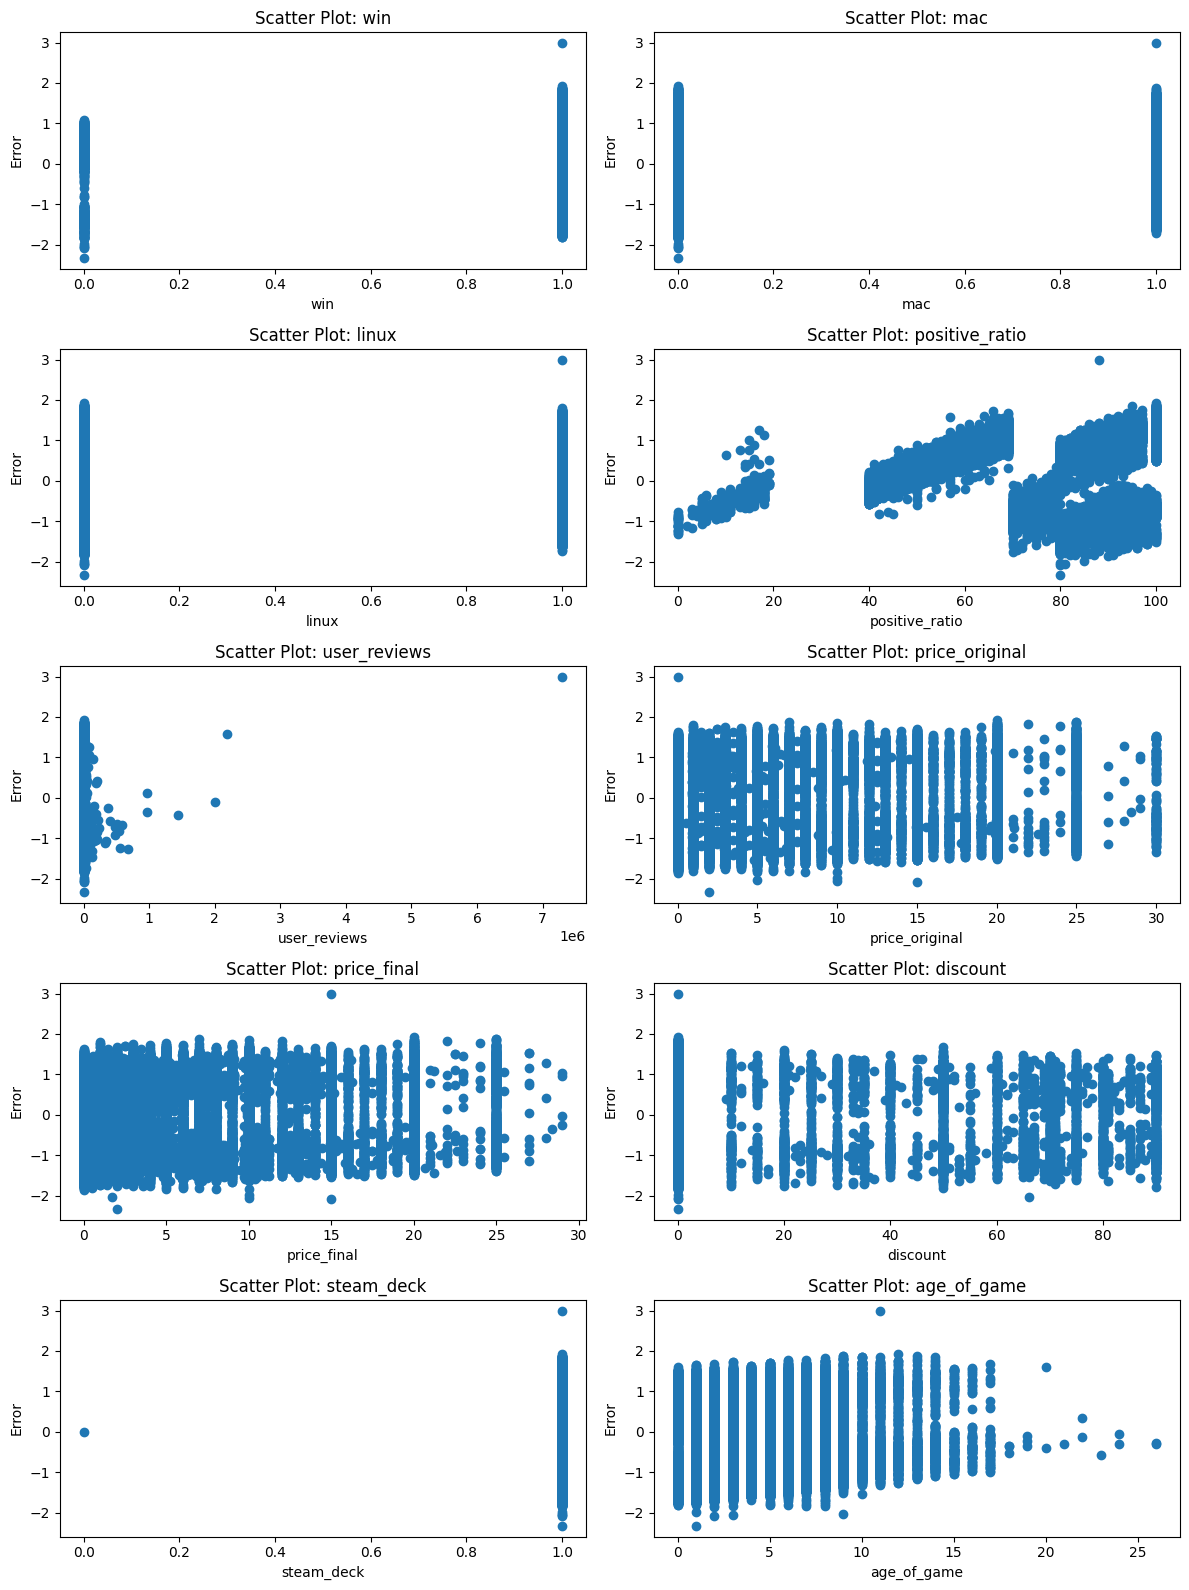

In [975]:
# Select the variables and error column
variables = ['win', 'mac', 'linux', 'positive_ratio', 'user_reviews','price_original', 'price_final', 'discount', 'steam_deck', 'age_of_game']
error = res['error']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 16))

# Flatten the axes array
axes = axes.flatten()

# Create scatter plots for each variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.scatter(df[var], error)
    ax.set_xlabel(var)
    ax.set_ylabel('Error')
    ax.set_title(f'Scatter Plot: {var}')

# Remove empty subplots
if len(variables) < len(axes):
    for j in range(len(variables), len(axes)):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()
plt.show()

((array([-4.1806568 , -3.97440679, -3.86194164, ...,  3.86194164,
          3.97440679,  4.1806568 ]),
  array([-2.32878616, -2.07811964, -2.06901984, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

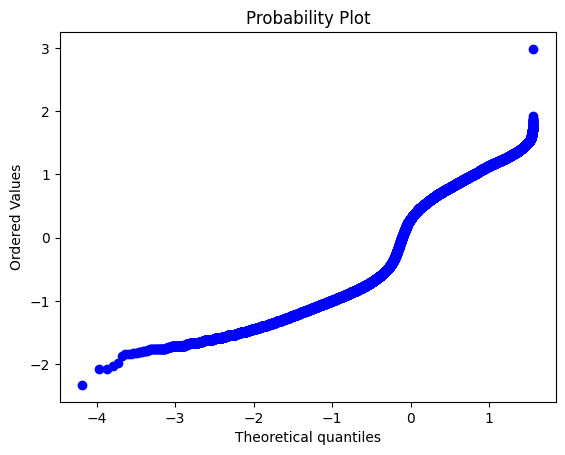

In [976]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [977]:
infl = results.get_influence()
print(infl.summary_frame())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:889: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))


KeyboardInterrupt: 

In [ ]:
infl.summary_frame()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [ ]:
res

In [978]:
# separate features and target
categorical_features = ['win', 'mac', 'linux','steam_deck']
numerical_features = ['positive_ratio', 'user_reviews','price_original', 'price_final', 'discount', 'steam_deck', 'age_of_game']
target = 'rating'

In [979]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [980]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [981]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [982]:
from sklearn.metrics import mean_squared_error, r2_score

In [983]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [984]:
linear_regression.fit(X_train, y_train)

ValueError: Selected columns, ['win', 'mac', 'linux', 'steam_deck'], are not unique in dataframe

In [985]:
pred = linear_regression.predict(X_test)
pred
print(np.sqrt(mean_squared_error(pred,y_test)))
print(r2_score(pred,y_test))

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [986]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [987]:
ridge_regression.fit(X_train, y_train)

ValueError: Selected columns, ['win', 'mac', 'linux', 'steam_deck'], are not unique in dataframe

In [988]:
pred_ridge = ridge_regression.predict(X_test)
pred
print(np.sqrt(mean_squared_error(pred_ridge,y_test)))
print(r2_score(pred_ridge,y_test))

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [989]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [990]:
lasso_regression.fit(X_train, y_train)

ValueError: Selected columns, ['win', 'mac', 'linux', 'steam_deck'], are not unique in dataframe

In [ ]:
lasso_pred = lasso_regression.predict(X_test)
print(np.sqrt(mean_squared_error(lasso_pred, y_test)))
print(r2_score(lasso_pred,y_test))

In [ ]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [ ]:
elasticnet_regression.fit(X_train, y_train)

In [ ]:
elasticnet_pred = elasticnet_regression.predict(X_test)
print(np.sqrt(mean_squared_error(elasticnet_pred, y_test)))
print(r2_score(elasticnet_pred,y_test))